<a href="https://colab.research.google.com/github/RGologorsky/fastproj/blob/master/Image_Segmentation_Hair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal: label pixels with hair

## Imports

In [0]:
%matplotlib inline

In [0]:
%%capture
!pip install fastai2

In [2]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from pathlib import Path

In [0]:
from google.colab import drive

In [0]:
# utils
def pp_list(l): print(f"len {len(l)}:", *l, sep="\n")

In [53]:
pp_list(range(2))

len 2:
0
1


## Unzip Data

In [0]:
drive.mount('/content/drive')

In [0]:
base_path = Path("drive/My Drive/fastai_proj")

In [0]:
proj = "segmentation"
proj_path = base_path/proj
pp_list(proj_path.ls())

In [0]:
data_src = proj_path/"face_segment_data_sampleset.zip"
data_dest = proj_path/"data"

In [0]:
# !unzip -qq "$data_src" -d "$data_dest"

## View data w/labels

In [0]:
path_lbl = data_dest/"labels"
path_img = data_dest

In [144]:
lbl_names = get_image_files(path_lbl)
pp_list(lbl_names[:3])

len 3:
drive/My Drive/fastai_proj/segmentation/data/labels/femalefelice/headrende0000.png
drive/My Drive/fastai_proj/segmentation/data/labels/femalefelice/headrende0020.png
drive/My Drive/fastai_proj/segmentation/data/labels/femalefelice/headrende0040.png


In [0]:
# look for images in all folders except for "labels"
def rm_path_prefix(f, prefix=path_img): return str(f).replace(f"{prefix}/", "")
img_folders = [rm_path_prefix(p) for p in path_img.ls() if p != path_lbl]

# def rm_parent_path(f): return re.search("(?!.*\/).*", str(f)).group(0)

In [159]:
fnames = get_image_files(data_dest, recurse=True, folders=img_folders)
pp_list(fnames[:3])

len 3:
drive/My Drive/fastai_proj/segmentation/data/femalefelice_env04/headrende0000.png
drive/My Drive/fastai_proj/segmentation/data/femalefelice_env04/headrende0020.png
drive/My Drive/fastai_proj/segmentation/data/femalefelice_env04/headrende0040.png


# Associate fname to label

In [0]:
path_lbl = data_dest/"labels"

In [54]:
fnames = get_image_files(data_dest, recurse=True)
pp_list(fnames[:3])

len 3:
drive/My Drive/fastai_proj/segmentation/data/femalefelice_env04/headrende0000.png
drive/My Drive/fastai_proj/segmentation/data/femalefelice_env04/headrende0020.png
drive/My Drive/fastai_proj/segmentation/data/femalefelice_env04/headrende0040.png


In [0]:
lbl_names = get_image_files()

## View image/label mask

In [117]:
data_dest

Path('drive/My Drive/fastai_proj/segmentation/data')

In [0]:
get_y_fn = lambda x: path_lbl/rm_path_prefix(x)

In [161]:
get_y_fn(fnames[0]) == lbl_names[0]

False

In [162]:
pp_list([get_y_fn(fnames[0]), lbl_names[0]])

len 2:
drive/My Drive/fastai_proj/segmentation/data/labels/femalefelice_env04/headrende0000.png
drive/My Drive/fastai_proj/segmentation/data/labels/femalefelice/headrende0000.png


In [163]:
fnames[0].stem

'headrende0000'

In [164]:
fnames[0].parent

Path('drive/My Drive/fastai_proj/segmentation/data/femalefelice_env04')

In [165]:
re.search(".*(?=_)", str(fnames[0].parent)).group(0)

'drive/My Drive/fastai_proj/segmentation/data/femalefelice'

In [135]:
str(fnames[0]).replace(str(path_img), str(path_lbl))

'drive/My Drive/fastai_proj/segmentation/data/labels/femalefelice_env04/headrende0000.png'

In [133]:
path_img

Path('drive/My Drive/fastai_proj/segmentation/data')

In [126]:
lbl_names[0]

Path('drive/My Drive/fastai_proj/segmentation/data/labels/femalefelice/headrende0000.png')

In [123]:
get_y_fn(fnames[0])

'drive/My Drive/fastai_proj/segmentation/data/femalefelice_env04'

In [0]:
idx = 0
img_f = PILImage.create(fnames[idx])
img_l = PILImage.create(lbl_names[idx])

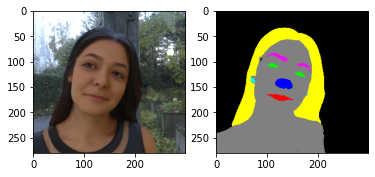

In [113]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 2)
ax1.imshow(img_f)
ax2.imshow(img_l)
plt.show()